In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv("covid_data_nonas.csv")
df

,Unnamed: 0,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died,age_group,severity
0,0,2,1,1,0,03/05/2020,0.0,1.0,65,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,4.0,4.0
1,1,2,1,2,0,03/06/2020,0.0,1.0,72,0.0,...,0.0,0.0,1.0,1.0,0.0,0,0.0,1,4.0,4.0
2,2,2,1,2,1,09/06/2020,1.0,0.0,55,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,3.0,4.0
3,3,2,1,1,0,12/06/2020,0.0,0.0,53,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1,3.0,4.0
4,4,2,1,2,0,21/06/2020,0.0,0.0,68,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048549,1048570,2,13,2,0,9999-99-99,0.0,0.0,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,2.0,1.0
1048550,1048571,1,13,2,1,9999-99-99,0.0,0.0,51,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,3.0,1.0
1048551,1048572,2,13,2,0,9999-99-99,0.0,0.0,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,3.0,1.0
1048552,1048573,2,13,2,0,9999-99-99,0.0,0.0,28,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,2.0,1.0


In [6]:
age_severity = df[['age_group', 'severity']].copy()

In [12]:
agg_age_severity = age_severity.groupby(['age_group','severity'])['severity'].count().unstack()

In [13]:
print(agg_age_severity)

severity      1.0    2.0   3.0    4.0
age_group                            
1.0         70899   4030  1747    932
2.0        422304  19472  2362   5781
3.0        310187  32766  5067  28656
4.0         69721  17649  3191  34527
5.0          8682   3093   443   7045


In [21]:
agg_age_severity.index = ['0-20', '21-40', '41-60', '62-80', '80+']
agg_age_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

<AxesSubplot:>

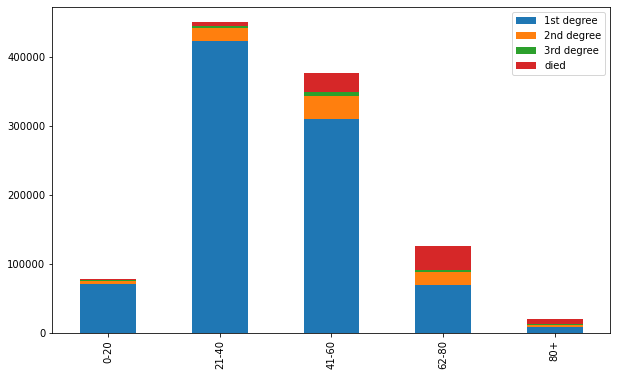

In [53]:
#wykres prezentujący liczbę pacjentów z każdym poziomem zachorowania w grupach wiekowych (liczby absolutne)
agg_age_severity.plot(kind='bar', stacked=True, figsize=(10, 6))

In [23]:
percentage_age_severity = pd.crosstab(index=df['age_group'],
                             columns=df['severity'],
                             normalize="index")
percentage_age_severity

severity,1.0,2.0,3.0,4.0
age_group,,,,
1.0,0.913553,0.051928,0.022511,0.012009
2.0,0.938622,0.043279,0.005250,0.012849
3.0,0.823485,0.086987,0.013452,0.076076
4.0,0.557376,0.141093,0.025510,0.276022
5.0,0.450709,0.160567,0.022997,0.365727


In [24]:
percentage_age_severity.index = ['0-20', '21-40', '41-60', '62-80', '80+']
percentage_age_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

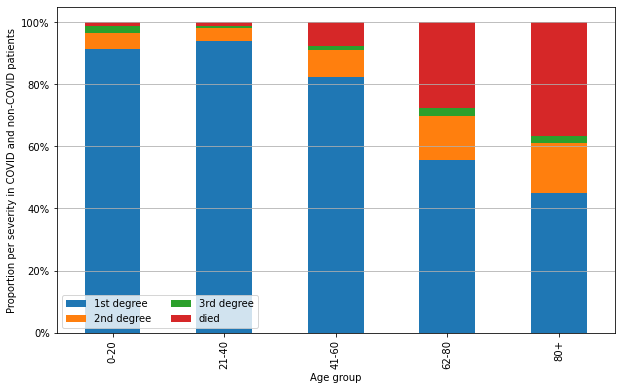

In [51]:
#wykres prezentujący liczbę pacjentów z każdym poziomem zachorowania w grupach wiekowych (procentowo, skala do 100% populacji grupy wiekowej, stąd wykresy są równe)
percentage_age_severity.plot(kind='bar', 
                            stacked=True, 
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.xlabel("Age group")
plt.ylabel("Proportion per severity in COVID and non-COVID patients")
plt.show()

In [26]:
#tabela tylko z COVID-em
df_covid = df[df['CLASIFFICATION_FINAL'] == 1]
df_covid

,Unnamed: 0,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died,age_group,severity
0,0,2,1,1,0,03/05/2020,0.0,1.0,65,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,4.0,4.0
2,2,2,1,2,1,09/06/2020,1.0,0.0,55,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,3.0,4.0
4,4,2,1,2,0,21/06/2020,0.0,0.0,68,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,4.0,4.0
5,5,2,1,1,1,9999-99-99,0.0,1.0,40,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,2.0,2.0
6,6,2,1,1,0,9999-99-99,0.0,0.0,64,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047912,1047933,1,13,1,1,9999-99-99,0.0,0.0,77,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,4.0,1.0
1047913,1047934,1,13,1,0,9999-99-99,0.0,0.0,55,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,3.0,1.0
1047914,1047935,1,13,2,0,9999-99-99,0.0,0.0,70,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,4.0,1.0
1047915,1047936,2,13,2,0,9999-99-99,0.0,0.0,32,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,2.0,1.0


In [31]:
#te same wykresy, ale tylko dla pacjentów z potwierdzonym covidem
covid_age_severity = df_covid[['age_group', 'severity']].copy()

In [32]:
covid_agg_age_severity = covid_age_severity.groupby(['age_group','severity'])['severity'].count().unstack()

In [33]:
covid_agg_age_severity.index = ['0-20', '21-40', '41-60', '62-80', '80+']
covid_agg_age_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

<AxesSubplot:>

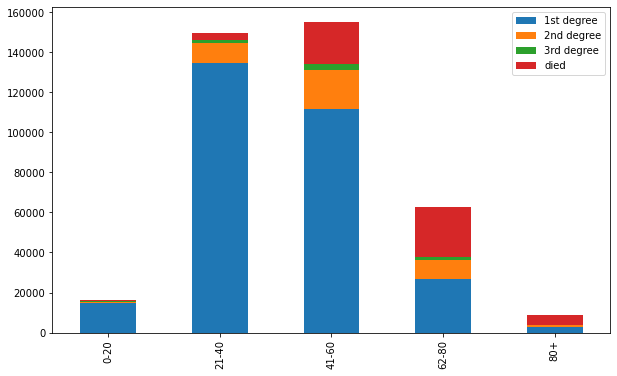

In [54]:
#wykres prezentujący liczbę pacjentów z każdym poziomem zachorowania w grupach wiekowych (liczby absolutne)
covid_agg_age_severity.plot(kind='bar', stacked=True, figsize=(10, 6))

In [42]:
covid_percentage_age_severity = pd.crosstab(index=df_covid['age_group'],
                             columns=df_covid['severity'],
                             normalize="index")
covid_percentage_age_severity

severity,1.0,2.0,3.0,4.0
age_group,,,,
1.0,0.922063,0.041019,0.021566,0.015351
2.0,0.900686,0.066352,0.008388,0.024574
3.0,0.720908,0.124550,0.020466,0.134076
4.0,0.423876,0.151214,0.028269,0.396641
5.0,0.313596,0.130384,0.019505,0.536515


In [43]:
covid_percentage_age_severity.index = ['0-20', '21-40', '41-60', '62-80', '80+']
covid_percentage_age_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

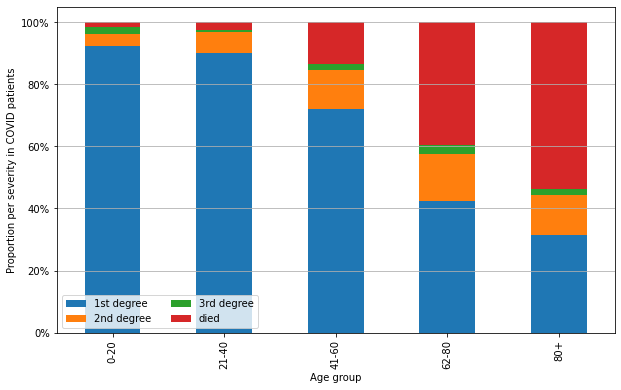

In [49]:
#wykres prezentujący liczbę pacjentów z każdym poziomem zachorowania w grupach wiekowych (procentowo, skala do 100% populacji grupy wiekowej, stąd wykresy są równe)
covid_percentage_age_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.xlabel("Age group")
plt.ylabel("Proportion per severity in COVID patients")
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048554 entries, 0 to 1048553
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1048554 non-null  int64  
 1   USMER                 1048554 non-null  int64  
 2   MEDICAL_UNIT          1048554 non-null  int64  
 3   SEX                   1048554 non-null  int64  
 4   PATIENT_TYPE          1048554 non-null  int64  
 5   DATE_DIED             1048554 non-null  object 
 6   INTUBED               1048554 non-null  float64
 7   PNEUMONIA             1048554 non-null  float64
 8   AGE                   1048554 non-null  int64  
 9   PREGNANT              1048554 non-null  float64
 10  DIABETES              1048554 non-null  float64
 11  COPD                  1048554 non-null  float64
 12  ASTHMA                1048554 non-null  float64
 13  INMSUPR               1048554 non-null  float64
 14  HIPERTENSION          1048554 non-

In [98]:
percentage_diab_severity = pd.crosstab(index=df_covid['DIABETES'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_diab_severity

severity,1.0,2.0,3.0,4.0
DIABETES,,,,
0.0,0.790417,0.091883,0.014776,0.102924
1.0,0.479682,0.164091,0.029656,0.326571


In [100]:
percentage_diab2_severity = pd.crosstab(index=df_covid['DIABETES'],
                             columns=df_covid['severity'])
percentage_diab2_severity

severity,1.0,2.0,3.0,4.0
DIABETES,,,,
0.0,260730,30309,4874,33951
1.0,29794,10192,1842,20284


In [101]:
percentage_diab_severity.index = ['Non-diabetic', 'Diabetic']
percentage_diab_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

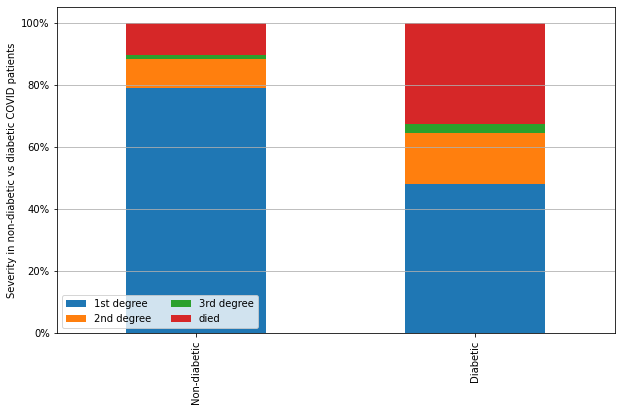

In [102]:
percentage_diab_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in non-diabetic vs diabetic COVID patients")
plt.show()

In [103]:
percentage_copd_severity = pd.crosstab(index=df_covid['COPD'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_copd_severity

severity,1.0,2.0,3.0,4.0
COPD,,,,
0.0,0.746561,0.102474,0.016976,0.133989
1.0,0.402381,0.156908,0.027076,0.413636


In [104]:
percentage_copd2_severity = pd.crosstab(index=df_covid['COPD'],
                             columns=df_covid['severity'])
percentage_copd2_severity

severity,1.0,2.0,3.0,4.0
COPD,,,,
0.0,288057,39539,6550,51699
1.0,2467,962,166,2536


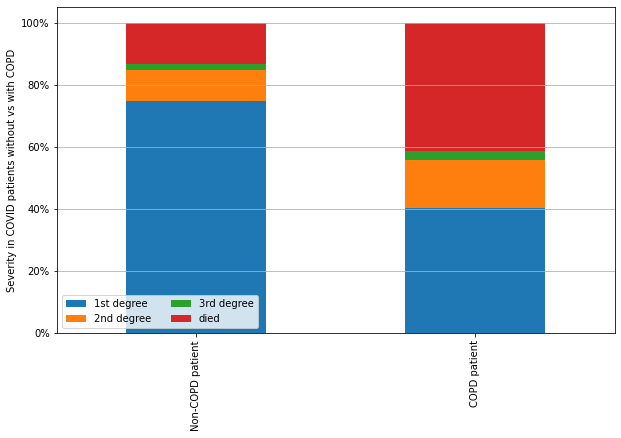

In [105]:
percentage_copd_severity.index = ['Non-COPD patient', 'COPD patient']
percentage_copd_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_copd_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in COVID patients without vs with COPD")
plt.show()

In [106]:
percentage_asthma_severity = pd.crosstab(index=df_covid['ASTHMA'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_asthma_severity

severity,1.0,2.0,3.0,4.0
ASTHMA,,,,
0.0,0.740104,0.103390,0.017211,0.139295
1.0,0.780542,0.100941,0.014310,0.104207


In [107]:
percentage_asthma2_severity = pd.crosstab(index=df_covid['ASTHMA'],
                             columns=df_covid['severity'])
percentage_asthma2_severity

severity,1.0,2.0,3.0,4.0
ASTHMA,,,,
0.0,282397,39450,6567,53150
1.0,8127,1051,149,1085


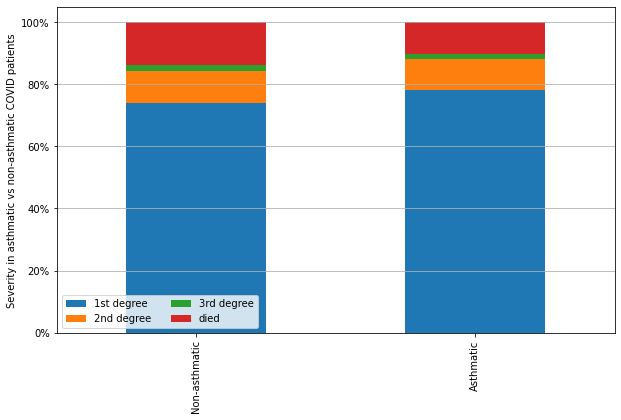

In [108]:
percentage_asthma_severity.index = ['Non-asthmatic', 'Asthmatic']
percentage_asthma_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_asthma_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in asthmatic vs non-asthmatic COVID patients")
plt.show()

In [74]:
percentage_hiper_severity = pd.crosstab(index=df_covid['HIPERTENSION'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_hiper_severity

severity,1.0,2.0,3.0,4.0
HIPERTENSION,,,,
0.0,0.793280,0.092967,0.015172,0.098581
1.0,0.527097,0.145887,0.025194,0.301822


In [109]:
percentage_hiper2_severity = pd.crosstab(index=df_covid['HIPERTENSION'],
                             columns=df_covid['severity'])
percentage_hiper2_severity

severity,1.0,2.0,3.0,4.0
HIPERTENSION,,,,
0.0,250083,29308,4783,31078
1.0,40441,11193,1933,23157


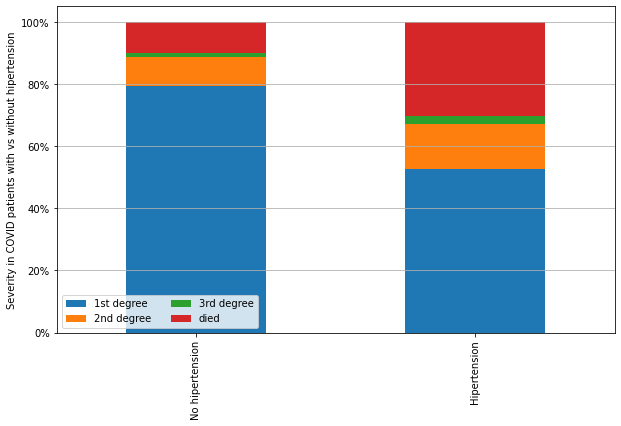

In [89]:
percentage_hiper_severity.index = ['No hipertension', 'Hipertension']
percentage_hiper_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_hiper_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in COVID patients without vs with hipertension")
plt.show()

In [75]:
percentage_cardio_severity = pd.crosstab(index=df_covid['CARDIOVASCULAR'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_cardio_severity

severity,1.0,2.0,3.0,4.0
CARDIOVASCULAR,,,,
0.0,0.746838,0.102363,0.016817,0.133982
1.0,0.486010,0.146720,0.031390,0.335881


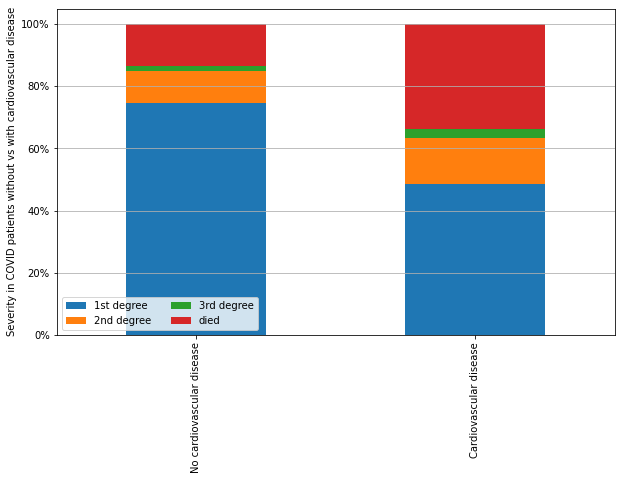

In [90]:
percentage_cardio_severity.index = ['No cardiovascular disease', 'Cardiovascular disease']
percentage_cardio_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_cardio_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in COVID patients without vs with cardiovascular disease")
plt.show()

In [76]:
percentage_obese_severity = pd.crosstab(index=df_covid['OBESITY'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_obese_severity

severity,1.0,2.0,3.0,4.0
OBESITY,,,,
0.0,0.758270,0.097621,0.015708,0.128401
1.0,0.666209,0.128344,0.023388,0.182059


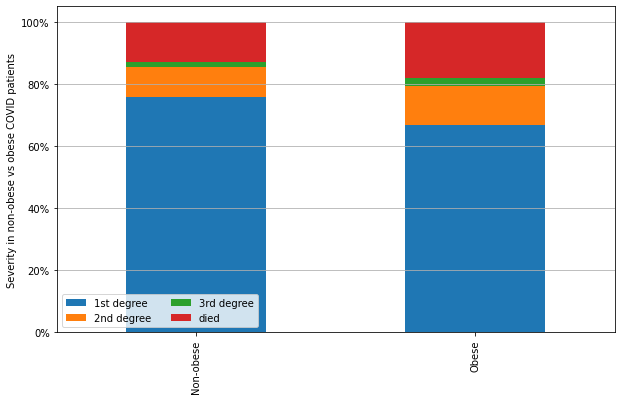

In [92]:
percentage_obese_severity.index = ['Non-obese', 'Obese']
percentage_obese_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_obese_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in non-obese vs obese COVID patients")
plt.show()

In [77]:
percentage_kidney_severity = pd.crosstab(index=df_covid['RENAL_CHRONIC'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_kidney_severity

severity,1.0,2.0,3.0,4.0
RENAL_CHRONIC,,,,
0.0,0.748732,0.102376,0.016918,0.131974
1.0,0.376383,0.149145,0.027540,0.446932


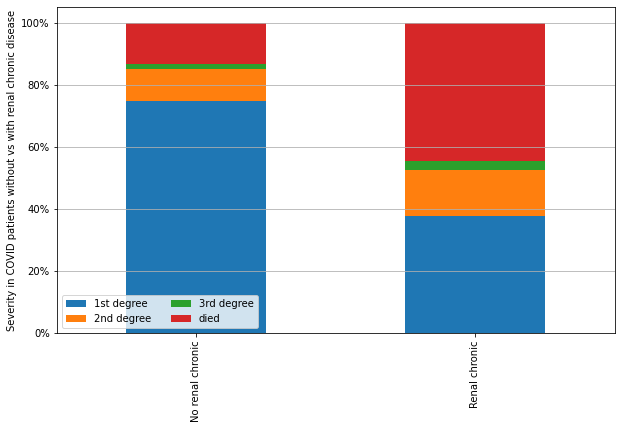

In [93]:
percentage_kidney_severity.index = ['No renal chronic', 'Renal chronic']
percentage_kidney_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_kidney_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in COVID patients without vs with renal chronic disease")
plt.show()

In [78]:
percentage_smoker_severity = pd.crosstab(index=df_covid['TOBACCO'],
                             columns=df_covid['severity'],
                             normalize="index")
percentage_smoker_severity

severity,1.0,2.0,3.0,4.0
TOBACCO,,,,
0.0,0.743042,0.102624,0.017075,0.137260
1.0,0.717630,0.112190,0.017881,0.152299


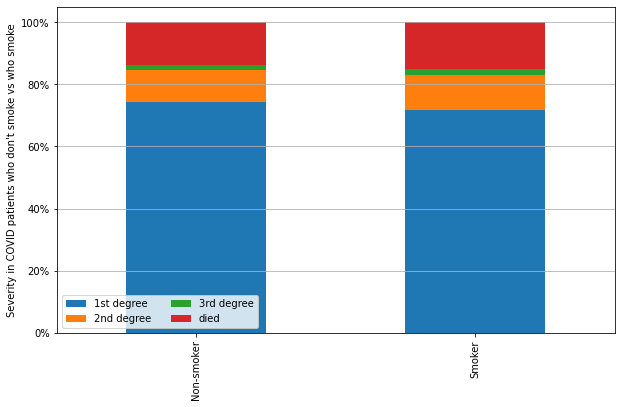

In [94]:
percentage_smoker_severity.index = ['Non-smoker', 'Smoker']
percentage_smoker_severity.columns = ['1st degree', '2nd degree', '3rd degree', 'died']

percentage_smoker_severity.plot(kind='bar', 
                            stacked=True,
                            figsize=(10, 6)).grid(axis='y')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Severity in COVID patients who don't smoke vs who smoke")
plt.show()